<a href="https://colab.research.google.com/github/varunyadav1175/Dubdub.aiTest/blob/main/Model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",
                                                    shuffle=True,
                                                   image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                   batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy)

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0])>>


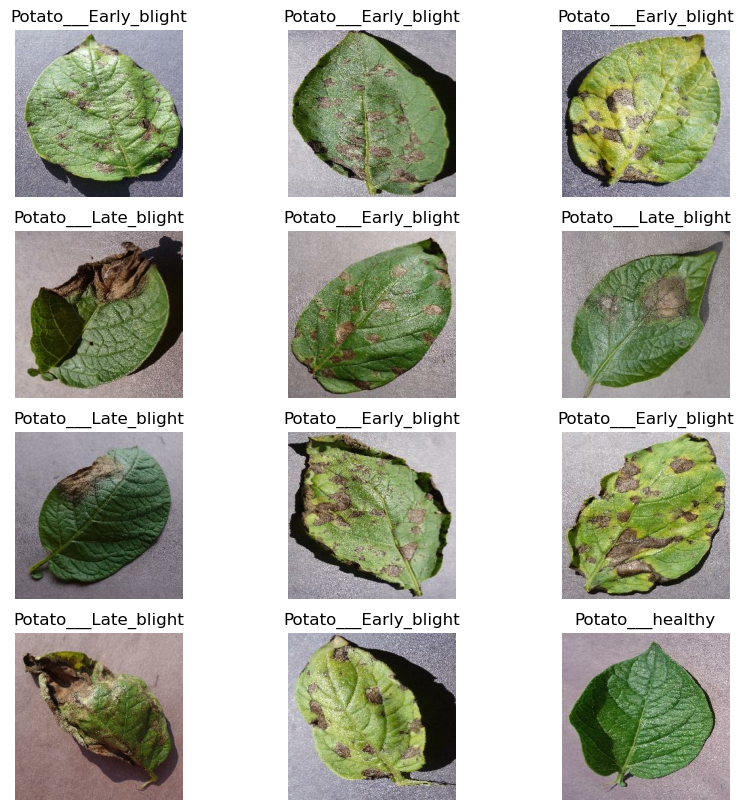

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
train_size=0.8

In [ ]:
train_ds = dataset.take(54)

In [ ]:
test_ds = dataset.skip(54)

In [ ]:
val_ds = test_ds.take(6)

In [ ]:
test_ds= test_ds.skip(6)

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle= True, shuffle_size=10000):
    ds_size= len(ds)
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed= 12)
    train_size= int(train_split*ds_size)
    val_size= int(val_split*ds_size)

    train_ds= ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation= 'relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, activation= 'relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, activation= 'relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs= 50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 77s 1s/step - loss: 0.9133 - accuracy: 0.5029 - val_loss: 0.8321 - val_accuracy: 0.5208
Epoch 2/50
54/54 [==============================] - 84s 2s/step - loss: 0.7092 - accuracy: 0.6829 - val_loss: 0.4453 - val_accuracy: 0.8594
Epoch 3/50
54/54 [==============================] - 96s 2s/step - loss: 0.4552 - accuracy: 0.8084 - val_loss: 0.3194 - val_accuracy: 0.8542
Epoch 4/50
54/54 [==============================] - 109s 2s/step - loss: 0.3101 - accuracy: 0.8762 - val_loss: 0.2750 - val_accuracy: 0.9010
Epoch 5/50
54/54 [==============================] - 103s 2s/step - loss: 0.2701 - accuracy: 0.8843 - val_loss: 0.1691 - val_accuracy: 0.9427
Epoch 6/50
54/54 [==============================] - 108s 2s/step - loss: 0.2260 - accuracy: 0.9149 - val_loss: 0.1544 - val_accuracy: 0.9531
Epoch 7/50
10/54 [====>.........................] - ETA: 1:21 - loss: 0.1814 - accuracy: 0.9469

KeyboardInterrupt: 